/home/andreasstillits/coding/Leaves1D/supplementary/notebooks
/home/andreasstillits/coding/Leaves1D


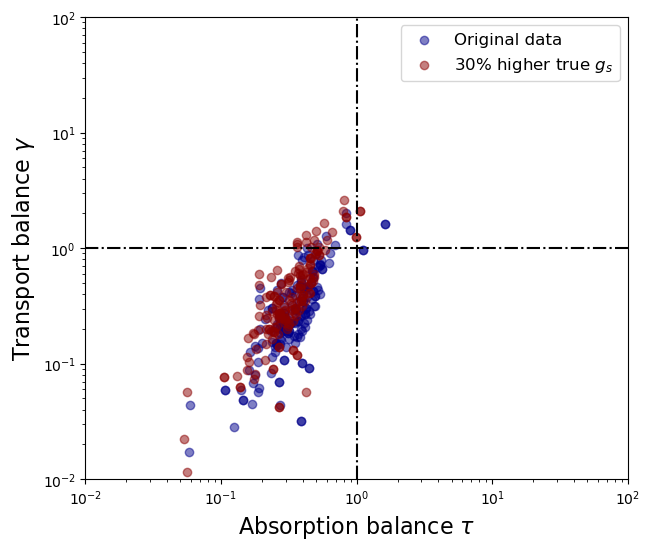

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd  

np.random.seed(142)  # for reproducibility

%cd "/home/andreasstillits/coding/Leaves1D/supplementary/notebooks"

df = pd.read_csv("../files/data/Knauer2022_pre_tau_gamma.csv", decimal=',', sep=';')

gs = df["stomatal_conductance"].to_numpy()
gias = df["ias_conductance"].to_numpy()
gm = df["mesophyll_conductance*"].to_numpy()
An = df["An"].to_numpy() 
Ci = df["substomatal_conc"].to_numpy()
C_ = df["compensation_point"].to_numpy() 
Ca = df["Ca_gas_exchange"].to_numpy()

%cd "/home/andreasstillits/coding/Leaves1D/"
from python_module.interface import numpy_estimate_parameters

# original values
taus, gammas = numpy_estimate_parameters(gm, gs, gias)

# now assume gs to be 30% higher than it is, then probagate to Ci and gm

gs_new = 1.30 * gs 
Ci_new = Ca - An / gs_new
gm_new = An / (Ci_new - C_)

taus_new, gammas_new = numpy_estimate_parameters(gm_new, gs_new, gias)


figure, (ax1) = plt.subplots(1, 1, figsize=(7, 6))

ax1.scatter(taus, gammas, marker="o", color="darkblue", alpha=0.5, label="Original data")
ax1.scatter(taus_new, gammas_new, marker="o", color="darkred", alpha=0.5, label="30% higher true $g_s$")
ax1.set_xlabel(r"Absorption balance $\tau$", fontsize=16)
ax1.set_ylabel(r"Transport balance $\gamma$", fontsize=16) 
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(0.01, 100)
ax1.set_ylim(0.01, 100)
ax1.plot([1, 1], [0.01, 100], color="black", linestyle="-.")
ax1.plot([0.01, 100], [1, 1], color="black", linestyle="-.")
ax1.legend(fontsize=12)

plt.savefig("supplementary/figures/bias_humidity.jpg", dpi=900)
plt.show()
